# Mineração em Grafos

Luana Lima Freitas - T6

## Video do trabalho
 [Clique aqui para assistir](https://)

In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import gdown
import re
import sys
import glob
import difflib
import matplotlib.pyplot as plt
from itertools import combinations

## Importando os dados

In [2]:
# Baixando o arquivo
!gdown 1jD_dF0wUoVfndQtUSVJF7LbhXtswj62Q

Downloading...
From: https://drive.google.com/uc?id=1jD_dF0wUoVfndQtUSVJF7LbhXtswj62Q
To: /content/genius.zip
100% 1.11M/1.11M [00:00<00:00, 108MB/s]


In [3]:
# Extraindo o arquivo
!unzip genius.zip

Archive:  genius.zip
replace __MACOSX/._genius? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

### Convertendo o arquivo em DF

In [4]:
caminho = 'genius/*/*.txt'
arquivos = glob.glob(caminho)

got = {}
for arquivo in sorted(arquivos):
    chave = arquivo[-14:-4]

    with open(arquivo, 'r', encoding = 'utf-8') as f:
        texto = f.read()

    got[chave] = texto

In [5]:
colunas = ['TEMPORADA', 'EPSODIO', 'TEXTO']
df = pd.DataFrame(columns=colunas)

for arquivo in sorted(arquivos):
    s = arquivo[-9:-7]
    e = arquivo[-6:-4]

    with open(arquivo, 'r', encoding = 'utf-8') as ep:
      for ln in ep.read().split('\n'):
        if ln != '' and ln is not None:
          nova_linha = {'TEMPORADA': s, 'EPSODIO': e, 'TEXTO': ln}
          df = df.append(nova_linha, ignore_index=True)


A saída de streaming foi truncada nas últimas 5000 linhas.
<ipython-input-5-2f69a85933c6>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(nova_linha, ignore_index=True)
<ipython-input-5-2f69a85933c6>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(nova_linha, ignore_index=True)
<ipython-input-5-2f69a85933c6>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(nova_linha, ignore_index=True)
<ipython-input-5-2f69a85933c6>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(nova_linha, ignore_index=True)
<ipython-input-5-2f69a85933c6>:12: FutureWarning: The frame.append method is 

## Trabalhando o dado

### Encontrando o nome dos personagens

In [6]:
# Defininco se a linha é uma fala
# valid = re.compile(r'(.{1,30}?)(?:(?<!CUT TO)):')
valid = re.compile(r'(.{1,30}?):')
df['FALA'] = df['TEXTO'].apply(lambda x: bool(valid.match(x)))

In [7]:
# separando o nome dos personagens
df['PERSONAGEM'] = df['TEXTO'].str.extract(valid)
df['PERSONAGEM'] = df['PERSONAGEM'].str.replace('\(.+\)', '', regex=True)
df['PERSONAGEM'] = df['PERSONAGEM'].str.upper()
df['PERSONAGEM'] = df['PERSONAGEM'].fillna("-") # Sera que é melhor eu deletar logo essas linhas?
df['PERSONAGEM'] = df['PERSONAGEM'].str.strip()

In [8]:
# Corrigindo falsas falas
df['FALA'] = np.where(df['PERSONAGEM'] == 'INT', False, df['FALA'])
df['FALA'] = np.where(df['PERSONAGEM'] == 'EXT', False, df['FALA'])
df['FALA'] = np.where(df['PERSONAGEM'] == 'CUT TO', False, df['FALA'])
df['PERSONAGEM'] = df['PERSONAGEM'].str.replace('INT', '-', regex=True)
df['PERSONAGEM'] = df['PERSONAGEM'].str.replace('EXT', '-', regex=True)
df['PERSONAGEM'] = df['PERSONAGEM'].str.replace('CUT TO', '-', regex=True)
df['PERSONAGEM'] = df['PERSONAGEM'].str.replace(r'\bALL\b', '-', regex=True)

### Removendo coadjuvante

In [9]:
df_filtro = df[df['PERSONAGEM'].str.contains(r'[0-9]')]
coadjuvante = df_filtro['PERSONAGEM'].unique()

for c in coadjuvante:
  df['PERSONAGEM'] = df['PERSONAGEM'].str.replace(rf'\b{c}\b', '-', regex=True)

In [10]:
coadjuvante = [re.sub(r"[0-9]", "", elemento) for elemento in coadjuvante]
coadjuvante = [re.sub(r"#", "", elemento) for elemento in coadjuvante]
coadjuvante = [re.sub(r" $", "", elemento) for elemento in coadjuvante]
coadjuvante = set(coadjuvante)

for c in coadjuvante:
  df['PERSONAGEM'] = df['PERSONAGEM'].str.replace(rf'^{c}$', '-', regex=True)

In [11]:
df['PERSONAGEM'] = df['PERSONAGEM'].str.replace(rf'^MEN$', '-', regex=True)
df['PERSONAGEM'] = df['PERSONAGEM'].str.replace(rf'^MAN$', '-', regex=True)
df['PERSONAGEM'] = df['PERSONAGEM'].str.replace(rf'^LORD$', '-', regex=True)
df['PERSONAGEM'] = df['PERSONAGEM'].str.replace(rf'^SEPTA$', '-', regex=True)
df['PERSONAGEM'] = df['PERSONAGEM'].str.replace(rf'^WOMEN$', '-', regex=True)

### Tratando o nome dos personagens

In [12]:
df['PERSONAGEM'] = df['PERSONAGEM'].str.replace('LITTLEFINGER', 'PETYR', regex=True)
df['PERSONAGEM'] = df['PERSONAGEM'].str.replace('BAELISH', 'PETYR', regex=True)

df['PERSONAGEM'] = df['PERSONAGEM'].str.replace('EDDARD STARK', 'NED', regex=True)
df['PERSONAGEM'] = df['PERSONAGEM'].str.replace('EDDARD', 'NED', regex=True)

df['PERSONAGEM'] = df['PERSONAGEM'].str.replace('SAMWELL TARLY', 'SAM', regex=True)
df['PERSONAGEM'] = df['PERSONAGEM'].str.replace('SAMWELL', 'SAM', regex=True)

df['PERSONAGEM'] = df['PERSONAGEM'].str.replace('THE HOUND', 'SANDOR', regex=True)
df['PERSONAGEM'] = df['PERSONAGEM'].str.replace('HOUND', 'SANDOR', regex=True)

df['PERSONAGEM'] = df['PERSONAGEM'].str.replace('DANY', 'DAENERYS', regex=True)
df['PERSONAGEM'] = df['PERSONAGEM'].str.replace('DAENARYS STORMBORN', 'DAENERYS', regex=True)

df['PERSONAGEM'] = df['PERSONAGEM'].str.replace('HIGH SPARROW', 'SPARROW', regex=True)

df['PERSONAGEM'] = df['PERSONAGEM'].str.replace('MAESTER LUWIN', 'LUWIN', regex=True)
df['PERSONAGEM'] = df['PERSONAGEM'].str.replace('GRAND MAESTER PYCELLE', 'PYCELLE', regex=True)


In [13]:
# Removendo os principais sobremonos
# df['PERSONAGEM'] = df['PERSONAGEM'].str.replace('MEISTRE', '', regex=True)
df['PERSONAGEM'] = df['PERSONAGEM'].str.replace('LANNISTER', '', regex=True)
df['PERSONAGEM'] = df['PERSONAGEM'].str.replace('STARK', '', regex=True)
df['PERSONAGEM'] = df['PERSONAGEM'].str.replace('BARATHEON', '', regex=True)
df['PERSONAGEM'] = df['PERSONAGEM'].str.replace('TARGARYEN', '', regex=True)
df['PERSONAGEM'] = df['PERSONAGEM'].str.replace('MORMONT', '', regex=True)
df['PERSONAGEM'] = df['PERSONAGEM'].str.replace('GREYJOY', '', regex=True)
df['PERSONAGEM'] = df['PERSONAGEM'].str.replace('TARLY', '', regex=True)
df['PERSONAGEM'] = df['PERSONAGEM'].str.replace('SNOW', '', regex=True)

df['PERSONAGEM'] = df['PERSONAGEM'].str.strip()

In [14]:
df_filtro = df[df['PERSONAGEM'].str.contains(r'^\w{3,}$')]
personagens = df_filtro['PERSONAGEM'].unique()
personagens = personagens[(personagens != 'LORD') & (personagens != 'SEPTA') & ((personagens != 'MEISTRE'))]

def contains_nome(nome):
  for p in personagens:
    if re.match(rf'\b{p}\b', nome) :
      return p
  return nome

df['PERSONAGEM'] = df['PERSONAGEM'].apply(contains_nome)

In [15]:
personagens = df['PERSONAGEM'].value_counts().head(100).index.tolist()

def contains_correspondencia(nome):
  correspondencia = difflib.get_close_matches(nome, personagens, n=1, cutoff=0.8)
  if correspondencia:
      return correspondencia[0]
  else:
      return nome

df['PERSONAGEM'] = df['PERSONAGEM'].apply(contains_correspondencia)

In [16]:
# df_filtrado = df[df['PERSONAGEM'] == 'LORD']
# df_filtrado

# df_teste = df[df['PERSONAGEM'] == 'ALTON']
# df_teste = df[df['TEXTO'].str.contains(r'^TYCHO')]
# df_teste

### Gerando a lista dos personagens mais frequentes

In [17]:
counts_personagens = df[df['PERSONAGEM']!='-']['PERSONAGEM'].value_counts()
counts_personagens

TYRION               1862
JON                  1190
DAENERYS             1096
CERSEI               1037
JAIME                 978
                     ... 
MALE SINGER             1
VOICE                   1
SURVIVOR                1
STRONG                  1
UNSULLIED CAPTAIN       1
Name: PERSONAGEM, Length: 479, dtype: int64

In [18]:
indice = [i+1 for i in range(len(counts_personagens))]
cod_personagem = {i:j for i,j in enumerate(counts_personagens.index)}
cod_frequencia = {i:j for i,j in enumerate(counts_personagens.values)}

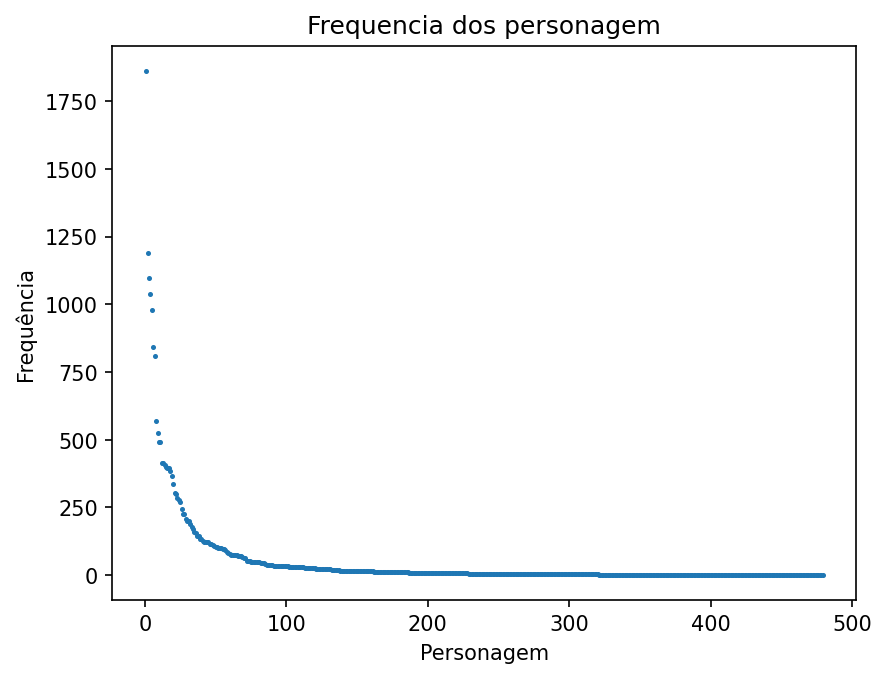

In [19]:
y_values = list(cod_frequencia.values())

plt.figure(dpi=150)
plt.scatter(x=indice, y=y_values, s=2)
plt.title('Frequencia dos personagem')
plt.xlabel('Personagem')
plt.ylabel('Frequência')
plt.show()

In [20]:
valor_acumulado = []
for i in range(len(counts_personagens)) :
    if i == 0:
        valor_acumulado.append(counts_personagens[i])
    else:
        valor_acumulado.append(valor_acumulado[i-1] + counts_personagens[i])

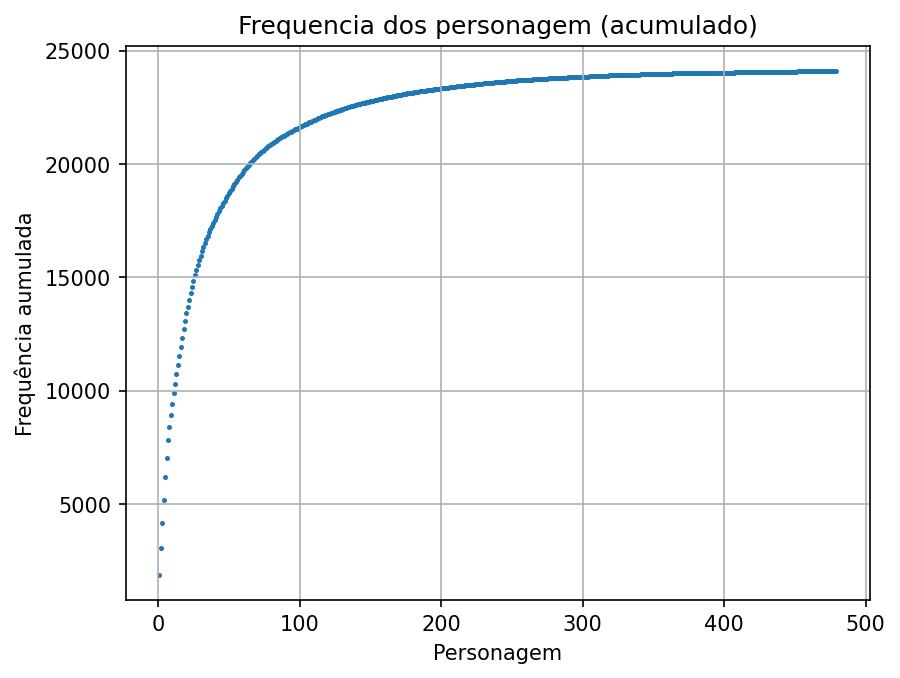

In [21]:
plt.figure(dpi=150)
plt.scatter(x=indice, y=valor_acumulado, s=2)
plt.title('Frequencia dos personagem (acumulado)')
plt.xlabel('Personagem')
plt.ylabel('Frequência aumulada')
plt.grid()
plt.show()

In [22]:
percentual = [ (i/valor_acumulado[-1])*100 for i in valor_acumulado ]

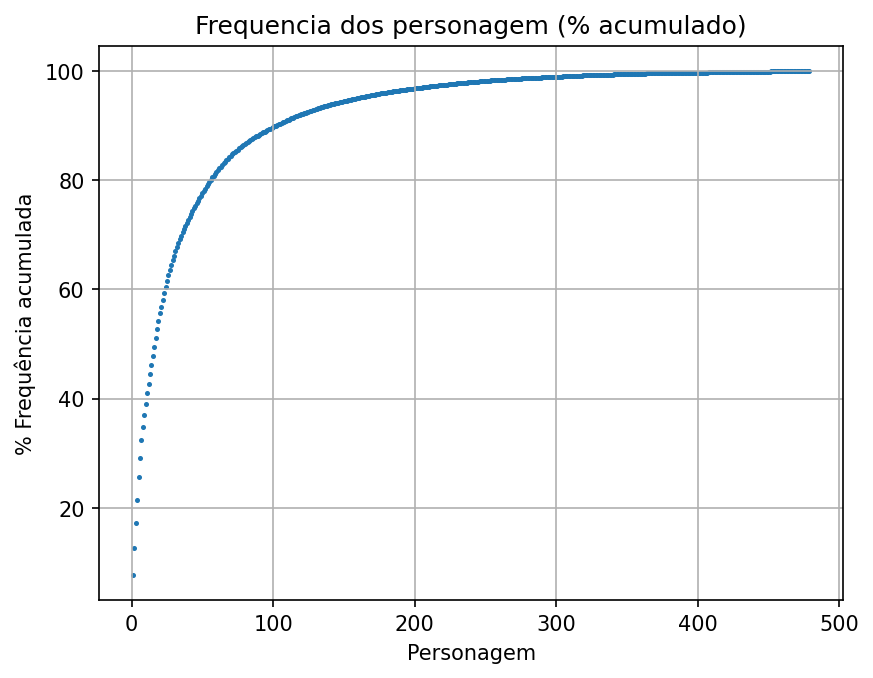

In [23]:
plt.figure(dpi=150)
plt.scatter(x=indice, y=percentual, s=2)
plt.title('Frequencia dos personagem (% acumulado)')
plt.xlabel('Personagem')
plt.ylabel('% Frequência acumulada')
plt.grid()
plt.show()

In [52]:
corte = 97
quantidade = len([i for i in percentual if i < corte])
personagens_principais = list(counts_personagens.index)[:quantidade]
df['PERSONAGEM_PRINCIPAIS'] = df['PERSONAGEM'].isin(personagens_principais)

In [53]:
len( personagens_principais)
# personagens_principais

206

### Separando as cenas

In [54]:
# Separando as cemas
c=1
cenas = []
for i in range(len(df)):
    # c += 1 if df.iloc[i,1] == 0 else 0
    if df.iloc[i,3] == False:
      if df.iloc[i-1,3] == True and i > 0 :
        c += 1
    cenas.append(c)

df['CENA'] = cenas

In [55]:
df_groupby = df.copy()
df_groupby = df_groupby[df_groupby["PERSONAGEM"] != "-"]
df_groupby = df_groupby[df_groupby["PERSONAGEM_PRINCIPAIS"] == True]
personagens = df_groupby['PERSONAGEM'].unique()

In [56]:
df_groupby = df_groupby.groupby('CENA')['PERSONAGEM'].unique().apply(list).reset_index()
df_groupby = df_groupby[df_groupby['PERSONAGEM'].apply(lambda x: len(x) > 1)]
df_groupby['LIST_OF_EDGES'] = df_groupby['PERSONAGEM'].apply(lambda chars: list(combinations(chars, 2)))

## Criando o Grafo

In [57]:
G = nx.Graph()
# G.add_nodes_from(personagens_principais)
G.add_nodes_from(personagens)

In [58]:
# Adicionando arestas ao grafo
for edges in df_groupby['LIST_OF_EDGES']:
  for e in edges:
    p1, p2 = e
    if G.has_edge(p1, p2):
      G[p1][p2]['peso'] += 1.0
    else:
      G.add_edge(p1, p2, peso=1.0)

In [59]:
# Obtenha os componentes conectados
connected_components = list(nx.connected_components(G))

# Escolha o componente conectado desejado (vamos usar o maior componente)
largest_component = max(connected_components, key=len)

# Crie um novo grafo apenas com as arestas do componente conectado desejado
new_G = G.subgraph(largest_component).copy()

In [104]:
d = dict(new_G.degree)
# labels = {node: node for node in d}
top_nomes = [valorm*10 for iteindice, valorm in d.items()]
top_nomes

[30,
 560,
 50,
 490,
 340,
 260,
 340,
 370,
 350,
 530,
 430,
 100,
 450,
 170,
 680,
 90,
 70,
 450,
 30,
 70,
 280,
 50,
 260,
 50,
 50,
 300,
 90,
 80,
 280,
 180,
 390,
 210,
 130,
 100,
 130,
 100,
 130,
 170,
 170,
 60,
 110,
 80,
 20,
 360,
 160,
 220,
 80,
 400,
 150,
 100,
 60,
 120,
 10,
 110,
 120,
 20,
 180,
 60,
 40,
 50,
 130,
 50,
 40,
 70,
 70,
 110,
 70,
 50,
 70,
 40,
 100,
 70,
 70,
 40,
 40,
 80,
 30,
 70,
 180,
 190,
 370,
 100,
 140,
 40,
 60,
 20,
 30,
 40,
 170,
 160,
 70,
 20,
 140,
 310,
 60,
 30,
 50,
 140,
 90,
 20,
 10,
 30,
 40,
 60,
 50,
 30,
 110,
 20,
 40,
 80,
 90,
 30,
 30,
 50,
 240,
 60,
 10,
 110,
 30,
 150,
 100,
 10,
 180,
 50,
 170,
 110,
 60,
 120,
 150,
 110,
 90,
 30,
 40,
 60,
 60,
 170,
 90,
 70,
 80,
 20,
 50,
 20,
 90,
 50,
 80,
 110,
 190,
 30,
 30,
 140,
 30,
 20,
 20,
 60,
 60,
 30,
 30,
 10,
 60,
 20,
 10,
 30,
 30,
 20,
 30,
 20,
 30,
 10,
 80,
 10,
 60,
 40,
 60,
 20,
 80,
 10,
 50,
 80,
 60,
 20,
 30,
 30,
 30,
 10,
 70,
 10,
 10

In [123]:
def plot_network(G, d, t=0, cmap = False):
  node_sizes = []
  if t == 1:
    node_sizes = [valorm*10 for iteindice, valorm in d.items()]
  else :
    node_sizes = [valorm*1000 for iteindice, valorm in d.items()]

  # define a largura das arestas
  edge_widths = [G[u][v]['peso'] * 0.03 for u, v in G.edges()]

  # cria um dicionário com os nomes dos TOP 20
  dict_ordenado = dict(sorted(d.items(), key=lambda item: item[1], reverse=True))
  top = list(dict_ordenado.items())[:20]
  top_nomes = [item[0] for item in top]
  labels = {node: node for node in top_nomes}

  i = 1
  for elemento in top:
    print(f'{i} {elemento[0]}: {elemento[1]}')
    i +=1

  plt.figure(figsize=(15, 15))
  pos = nx.spring_layout(G, iterations=50, seed=5)
  nx.draw(G,
          pos,
          with_labels=True,
          font_size=7,
          font_weight='bold',
          node_color = list(d.values()),
          node_size = node_sizes,
          labels=labels,
          linewidths = 0,
          width = edge_widths,
          edge_color='grey')
  plt.show()


1 TYRION: 68
2 JON: 56
3 JAIME: 53
4 SANSA: 49
5 ARYA: 45
6 DAENERYS: 45
7 CERSEI: 43
8 BRONN: 40
9 PETYR: 39
10 BRAN: 37
11 DAVOS: 37
12 SAM: 36
13 THEON: 35
14 NED: 34
15 CATELYN: 34
16 BRIENNE: 31
17 JOFFREY: 30
18 JORAH: 28
19 VARYS: 28
20 ROBB: 26


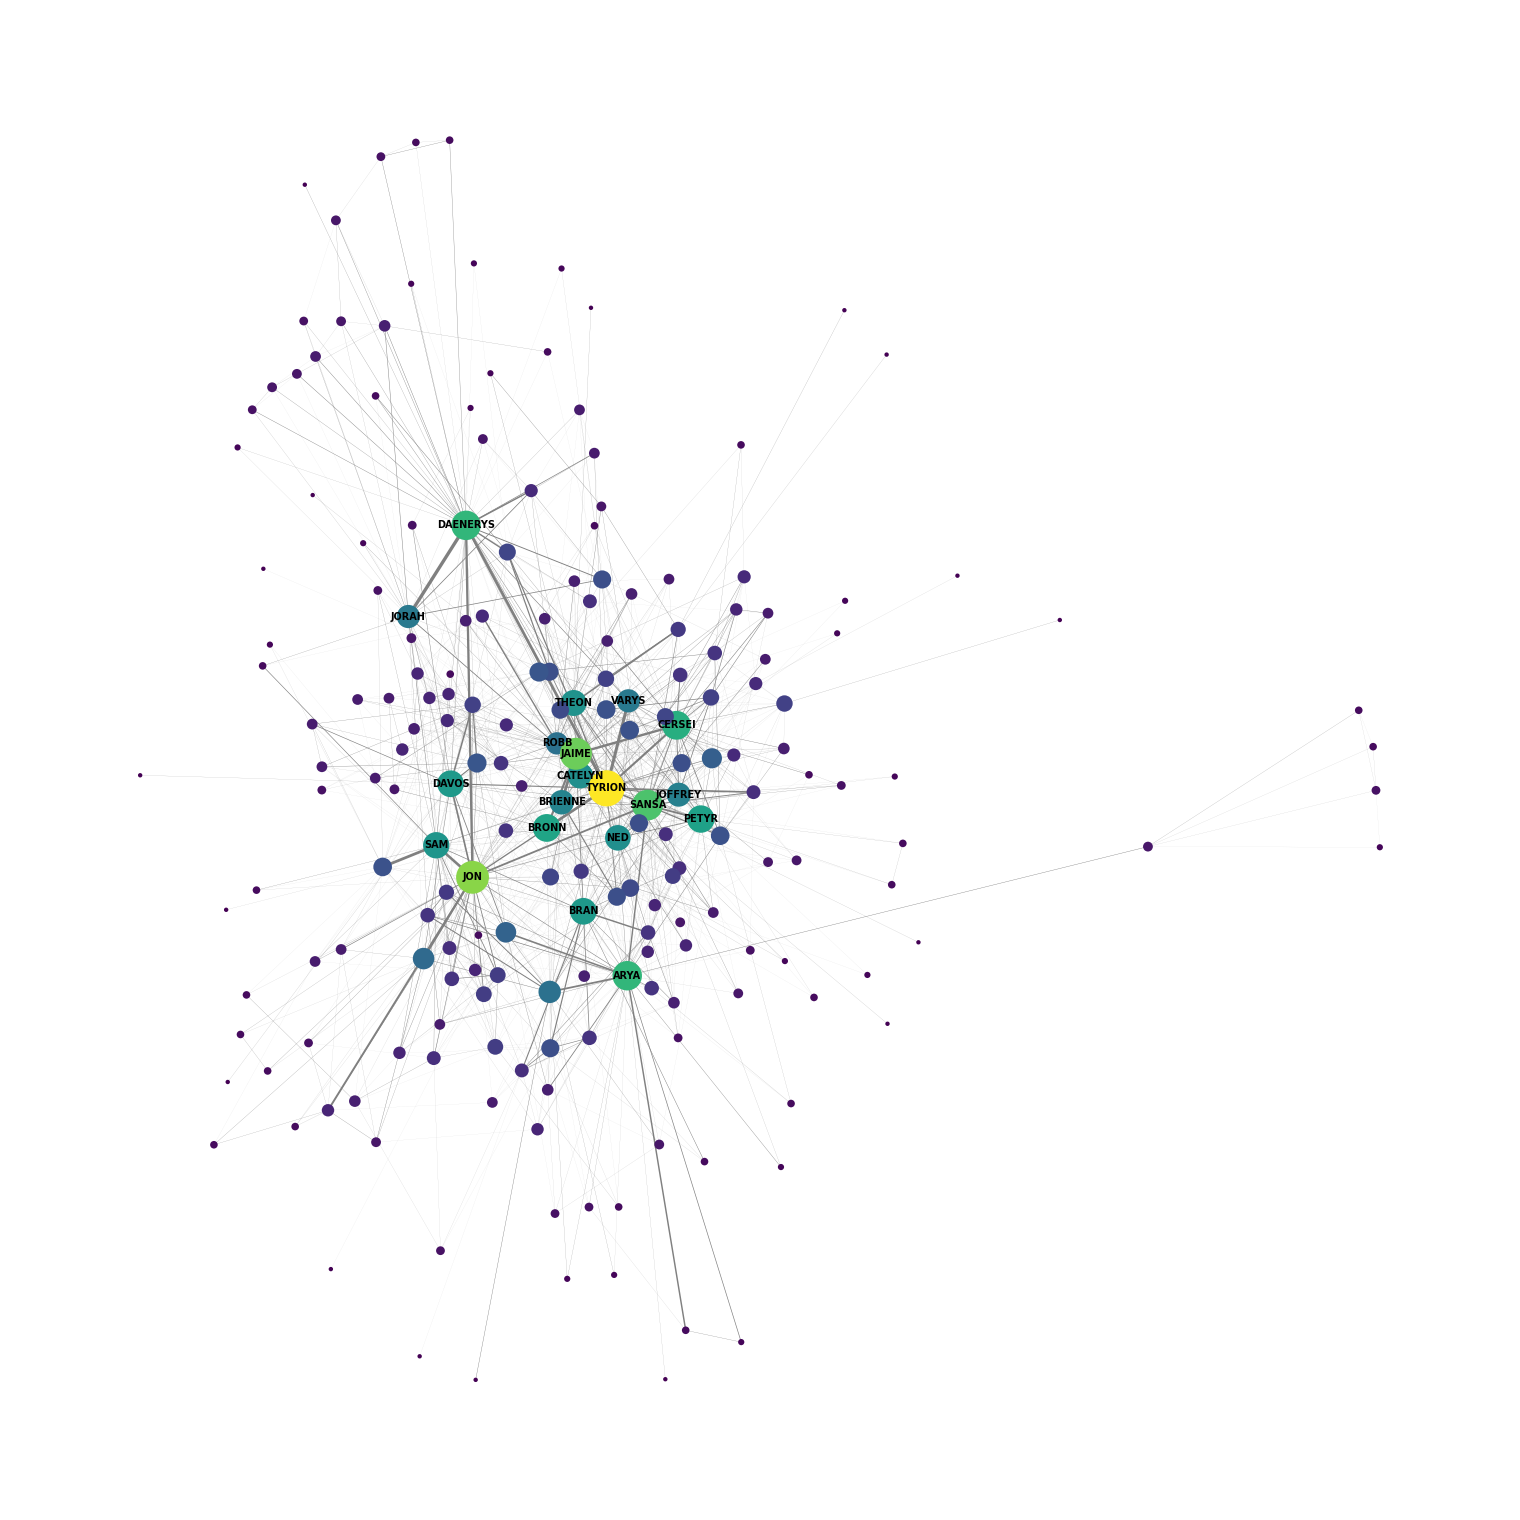

In [124]:
# Centralidade de grau
# A centralidade de grau mede a influência de um vértice através do seu grau.
degree_centrality = dict(new_G.degree)
plot_network(new_G, degree_centrality, 1)

1 TYRION: 0.277495099713194
2 SANSA: 0.22955114815204183
3 JAIME: 0.22879933658038132
4 JON: 0.21854978692706475
5 CERSEI: 0.2047357007581416
6 PETYR: 0.18770392294652496
7 ARYA: 0.18310308940476824
8 BRIENNE: 0.1733768321204724
9 CATELYN: 0.1730934889642991
10 NED: 0.17165519297530196
11 BRAN: 0.16657621055645602
12 JOFFREY: 0.16356582112382592
13 DAVOS: 0.16058135534934764
14 VARYS: 0.15578316355334368
15 DAENERYS: 0.15231060038180821
16 THEON: 0.14595413702051388
17 BRONN: 0.14586551172368734
18 SANDOR: 0.12534994193150648
19 SAM: 0.12063839318534503
20 ROBERT: 0.11358684108714787


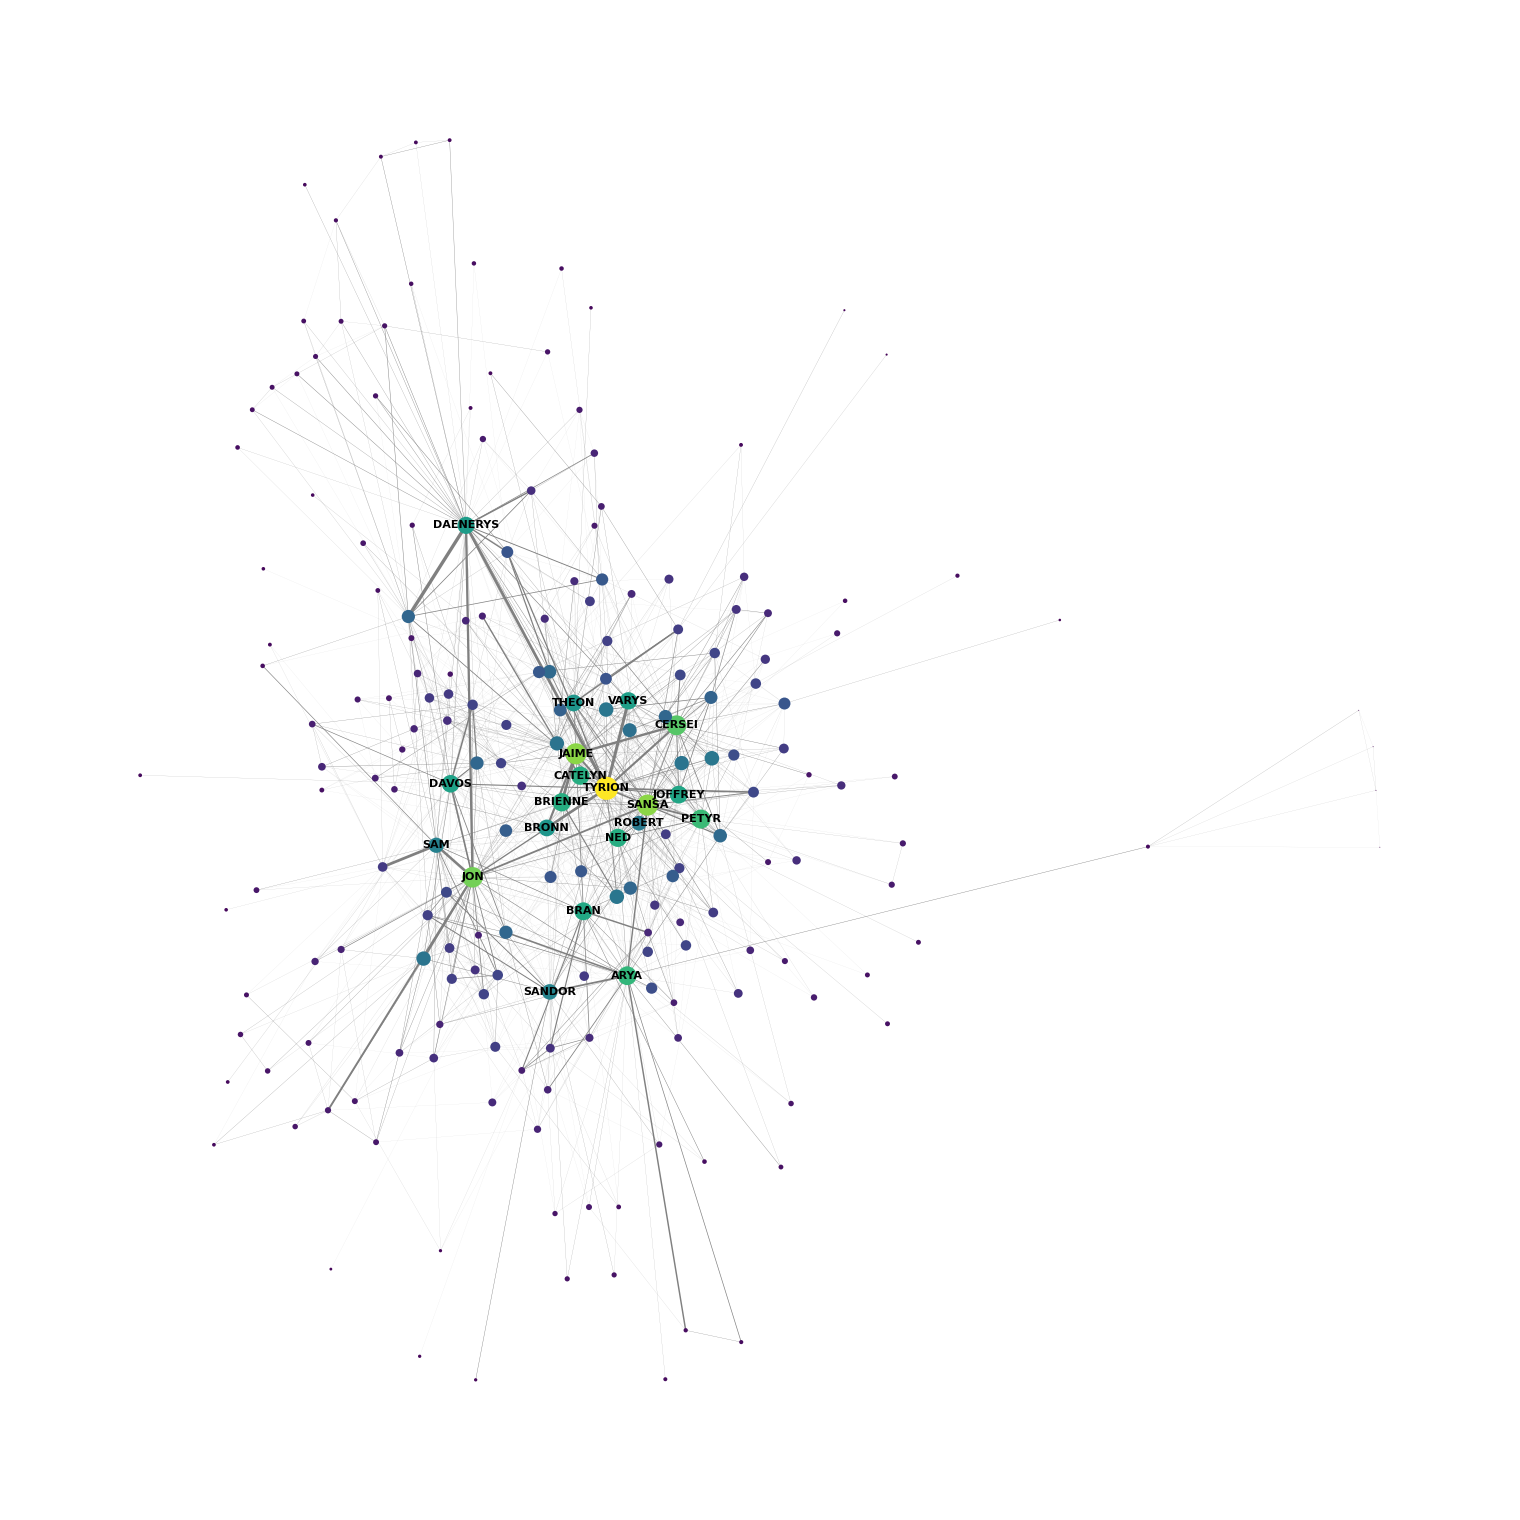

In [115]:
# Centralidade de autovetor
# Centralidade de autovetor mede a influência de um vértice através de dois fatores: O seu grau e a importância dos seus vizinhos.
eigenvector_centrality = nx.eigenvector_centrality(new_G)
plot_network(new_G, eigenvector_centrality)

1 TYRION: 0.277495099713194
2 SANSA: 0.22955114815204183
3 JAIME: 0.22879933658038132
4 JON: 0.21854978692706475
5 CERSEI: 0.2047357007581416
6 PETYR: 0.18770392294652496
7 ARYA: 0.18310308940476824
8 BRIENNE: 0.1733768321204724
9 CATELYN: 0.1730934889642991
10 NED: 0.17165519297530196
11 BRAN: 0.16657621055645602
12 JOFFREY: 0.16356582112382592
13 DAVOS: 0.16058135534934764
14 VARYS: 0.15578316355334368
15 DAENERYS: 0.15231060038180821
16 THEON: 0.14595413702051388
17 BRONN: 0.14586551172368734
18 SANDOR: 0.12534994193150648
19 SAM: 0.12063839318534503
20 ROBERT: 0.11358684108714787


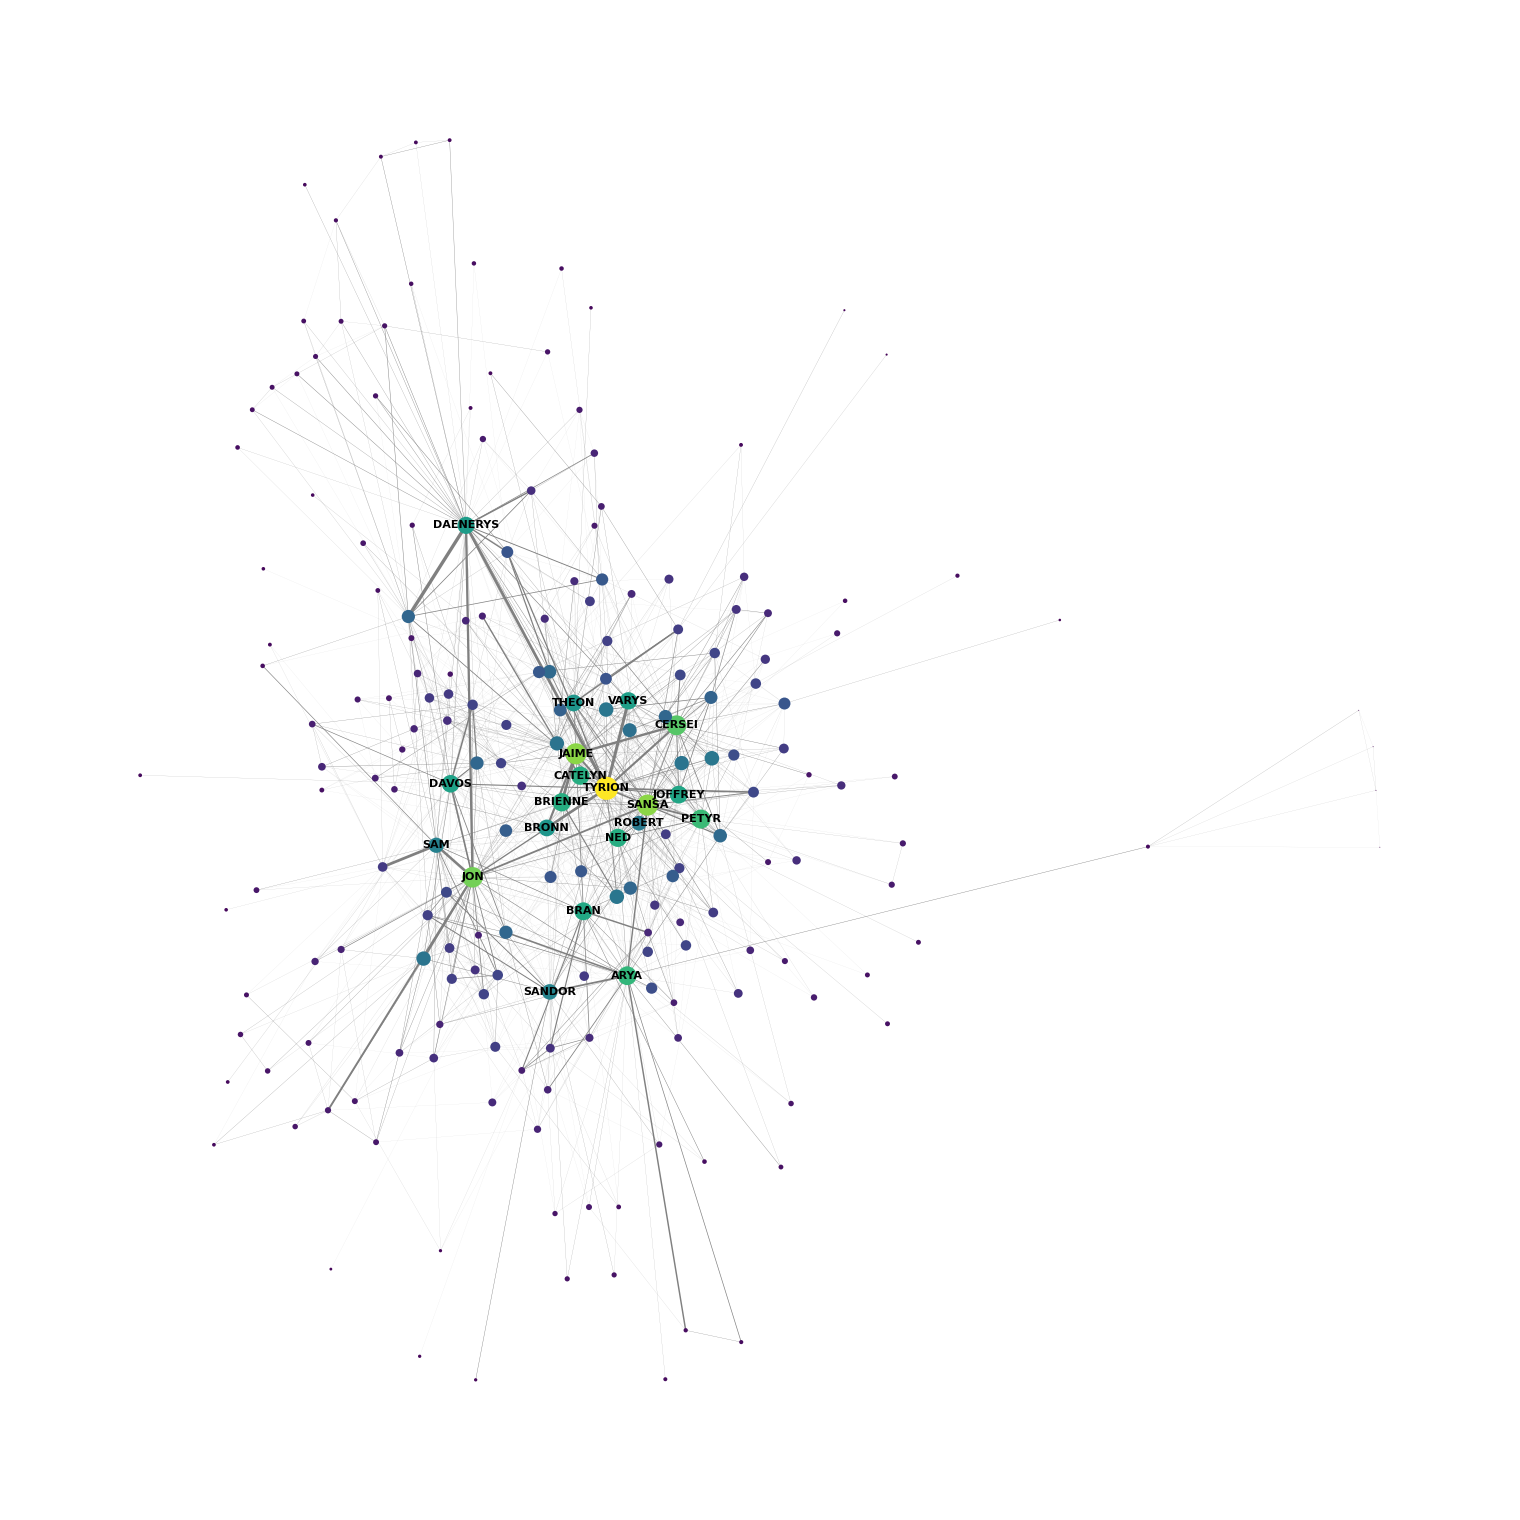

In [116]:
# PageRank
# PageRank, bem como a Centralidade de Katz, mede a influência de um vértice através
# de dois fatores: O seu grau e a importância atenuada dos seus vizinhos.

pagerank = nx.pagerank(new_G)
plot_network(new_G, eigenvector_centrality)